## linear regression

In [85]:
import numpy as np
from numpy.random import randn, randint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score

from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.callbacks import History , EarlyStopping, TensorBoard
history = History()

from matplotlib import pyplot
%matplotlib inline

In [2]:
data = make_regression(n_features=100, n_samples=10000, noise=1.0)

In [6]:
X = data[0]
y = data[1]

In [7]:
#plt.plot(X[0],y)

In [8]:
print(X.shape)
print(y.shape)

(10000, 100)
(10000,)


## model

In [9]:
from keras import backend as K
from keras import Sequential
from keras.layers import Dense, Input, BatchNormalization, Flatten
from keras.layers.normalization import BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X.mean(axis=0)

array([ 0.00907949, -0.00189441,  0.00652062, -0.00644898, -0.01631431,
        0.00106823,  0.00778035,  0.00808042,  0.00129312,  0.01214166,
       -0.00700522, -0.01905682, -0.00071089, -0.01005718, -0.0195479 ,
        0.00490721,  0.00393767, -0.00620955,  0.0019896 ,  0.0075504 ,
       -0.00994499, -0.00264212, -0.00432919,  0.00446179,  0.0026477 ,
       -0.0144071 , -0.00099685, -0.0091815 ,  0.00823751,  0.0004666 ,
       -0.00425293, -0.0065793 , -0.01662812, -0.0214542 , -0.00884387,
        0.00503281,  0.00363362,  0.0070218 ,  0.00885723, -0.00541894,
       -0.00306412, -0.00276816,  0.00260981, -0.01263101,  0.00689427,
       -0.01452086,  0.01970822, -0.01054998, -0.01235727,  0.00043658,
       -0.0039561 ,  0.01086819,  0.01902443, -0.00435724,  0.00762432,
        0.01766107,  0.00443224, -0.00970974, -0.00696154,  0.00276971,
       -0.01119508, -0.01252567, -0.02008661,  0.01081543,  0.00769622,
        0.00457605,  0.01008033, -0.00954041,  0.00050443,  0.00

In [12]:
scaler.fit_transform(X).mean(axis=0)

array([  1.12976295e-16,  -3.04034575e-17,  -2.15938378e-18,
         4.20774526e-17,   9.43245482e-17,   3.75255382e-18,
         8.21565038e-18,   2.21767049e-17,   2.64011035e-17,
         8.81128503e-17,   7.17204074e-18,  -9.63673585e-17,
        -1.44328993e-19,  -8.39328607e-18,   1.50546242e-17,
         1.38777878e-17,   3.76365605e-18,  -2.90878432e-18,
        -1.97397654e-17,   3.52273766e-17,  -9.31865696e-17,
        -9.47575352e-17,   4.92939023e-18,   5.22915045e-18,
        -5.14810417e-17,  -5.97744076e-17,  -1.09606768e-17,
         3.91908728e-18,   2.47801779e-17,   5.00655073e-17,
        -3.92130772e-17,  -1.97286631e-17,  -1.50324198e-17,
        -1.18682841e-17,  -1.44328993e-18,   1.76858528e-17,
        -2.56905608e-17,  -2.87991853e-17,  -7.01105840e-18,
         1.35114142e-17,  -3.61377595e-17,  -5.24025268e-18,
         4.86277685e-18,   7.08988424e-17,  -4.83613150e-17,
        -5.70876679e-17,  -5.27911048e-17,   2.10668288e-17,
         4.20219415e-18,

In [66]:
#import keras.backend as K#

#def custom_r2(y_true, y_pred):
#    return K.mean(y_pred)

# custom R2-score metrics for keras backend
from keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [77]:
# create model
def myModel():
    model = Sequential()
    model.add(Dense(100, input_dim=100))
    #model.add(BatchNormalization())
    model.add(Dense(100000,activation='relu'))
    model.add(Dropout(0.3, noise_shape=None, seed=None))
    #model.add(Dense(10, activation='linear'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam',
                  metrics=['mse', 'mae', 'mape', r2_keras])
    return model

estimator = KerasRegressor(build_fn=myModel)

# train model
#history = model.fit(X_train, y_train, epochs=1000, batch_size=len(X), verbose=1)

In [78]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('NN', estimator)
])

In [79]:
reg  = pipe.steps[-1][1]

In [80]:
keras_model = reg.build_fn()

In [81]:
keras_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_124 (Dense)            (None, 100000)            10100000  
_________________________________________________________________
dropout_1 (Dropout)          (None, 100000)            0         
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 100001    
Total params: 10,210,101
Trainable params: 10,210,101
Non-trainable params: 0
_________________________________________________________________


In [32]:
bla = history.on_epoch_end

In [33]:
bla

<bound method History.on_epoch_end of <keras.callbacks.History object at 0x7f1a9453b1d0>>

In [34]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

## CPU vs GPU

In [48]:
%%time
with tf.device('/cpu:0'):
    cross_val_score(estimator=pipe, X=X, y=y, fit_params={'NN__epochs':10, 'NN__callbacks':[history]})

Epoch 1/10
6666/6666 [==============================] - 28s 4ms/step - loss: 3487.9354 - mean_squared_error: 3487.9354 - mean_absolute_error: 25.7519 - mean_absolute_percentage_error: 47.9021 - cosine_proximity: -0.8845
Epoch 2/10
6666/6666 [==============================] - 27s 4ms/step - loss: 12.3349 - mean_squared_error: 12.3349 - mean_absolute_error: 2.7658 - mean_absolute_percentage_error: 12.6978 - cosine_proximity: -0.9841
Epoch 3/10
6666/6666 [==============================] - 27s 4ms/step - loss: 14.7557 - mean_squared_error: 14.7557 - mean_absolute_error: 3.0176 - mean_absolute_percentage_error: 11.5101 - cosine_proximity: -0.9853
Epoch 4/10
6666/6666 [==============================] - 27s 4ms/step - loss: 50.2549 - mean_squared_error: 50.2549 - mean_absolute_error: 5.5560 - mean_absolute_percentage_error: 21.3599 - cosine_proximity: -0.9745
Epoch 5/10
6666/6666 [==============================] - 27s 4ms/step - loss: 74.5734 - mean_squared_error: 74.5734 - mean_absolute_erro

KeyboardInterrupt: 

In [86]:
%%time
with tf.device('/gpu:0'):
    cross_val_score(estimator=pipe, X=X, y=y, fit_params={'NN__epochs':10, 'NN__callbacks':[history]})

Epoch 1/10
6666/6666 [==============================] - 5s 752us/step - loss: 3285.0851 - mean_squared_error: 3285.0851 - mean_absolute_error: 25.9165 - mean_absolute_percentage_error: 84.9200 - r2_keras: 0.8888
Epoch 2/10
6666/6666 [==============================] - 4s 635us/step - loss: 15.3654 - mean_squared_error: 15.3654 - mean_absolute_error: 3.1043 - mean_absolute_percentage_error: 11.6021 - r2_keras: 0.9995
Epoch 3/10
6666/6666 [==============================] - 4s 637us/step - loss: 9.7880 - mean_squared_error: 9.7880 - mean_absolute_error: 2.4590 - mean_absolute_percentage_error: 9.2982 - r2_keras: 0.9997
Epoch 4/10
6666/6666 [==============================] - 4s 637us/step - loss: 29.2304 - mean_squared_error: 29.2304 - mean_absolute_error: 4.2269 - mean_absolute_percentage_error: 15.3371 - r2_keras: 0.9990
Epoch 5/10
6666/6666 [==============================] - 4s 642us/step - loss: 99.9944 - mean_squared_error: 99.9944 - mean_absolute_error: 7.9172 - mean_absolute_percenta

In [87]:
history.history

{'loss': [3591.8419777824547,
  13.194988407508641,
  9.1523868771923951,
  19.919226301830356,
  55.71087526441854,
  45.66822297637102,
  53.955036652540542,
  92.539865107269534,
  73.912820074786055,
  28.123462778277101],
 'mean_absolute_error': [26.971164764735015,
  2.8908638690961648,
  2.412798720212896,
  3.4153453964727185,
  5.8875533651872898,
  5.3563727429196701,
  5.7417250966961388,
  7.5642630784644238,
  6.6481727576066261,
  4.1788736221510305],
 'mean_absolute_percentage_error': [55.422028437536198,
  10.090496568463813,
  8.2658136212452078,
  10.401399454220099,
  16.833456586250144,
  16.874503928073363,
  18.130589489459776,
  22.749054792457674,
  20.922370490381272,
  13.282851416864048],
 'mean_squared_error': [3591.8419777824547,
  13.194988407508641,
  9.1523868771923951,
  19.919226301830356,
  55.71087526441854,
  45.66822297637102,
  53.955036652540542,
  92.539865107269534,
  73.912820074786055,
  28.123462778277101],
 'r2_keras': [0.87989566217785531,

In [45]:
cross_val_score(estimator=pipe, X=X, y=y,scoring='r2', fit_params={'NN__epochs':10})

Epoch 1/10
6666/6666 [==============================] - 4s 626us/step - loss: 3412.9502 - mean_squared_error: 3412.9502 - mean_absolute_error: 25.7473 - mean_absolute_percentage_error: 67.9399 - cosine_proximity: -0.8860
Epoch 2/10
6666/6666 [==============================] - 4s 552us/step - loss: 10.9504 - mean_squared_error: 10.9504 - mean_absolute_error: 2.6021 - mean_absolute_percentage_error: 11.2848 - cosine_proximity: -0.98503s - loss: 18.7725 - mean_squar
Epoch 3/10
6666/6666 [==============================] - 4s 552us/step - loss: 10.9540 - mean_squared_error: 10.9540 - mean_absolute_error: 2.6233 - mean_absolute_percentage_error: 10.8930 - cosine_proximity: -0.9868
Epoch 4/10
6666/6666 [==============================] - 4s 551us/step - loss: 27.6749 - mean_squared_error: 27.6749 - mean_absolute_error: 4.1375 - mean_absolute_percentage_error: 14.7254 - cosine_proximity: -0.9850
Epoch 5/10
6666/6666 [==============================] - 4s 552us/step - loss: 93.7495 - mean_squared

array([ 0.99578245,  0.9989904 ,  0.99983934])

In [4]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [38]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16214274448064773804
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 4980736
locality {
  bus_id: 1
}
incarnation: 12145613270696571672
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:0c:00.0"
]


(0.98, 1.0056615480771214)

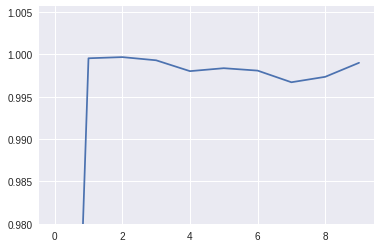

In [92]:
# plot metrics
#pyplot.plot(keras_model.history['mean_squared_error'])
#pyplot.plot(history.history['mean_absolute_error'])
#pyplot.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['r2_keras'])
plt.ylim(0.98)
#plt
#pyplot.plot(history.history['cosine_proximity'])
#pyplo.show()

In [ ]:
results = pd.DataFrame({'res':pipe.predict(X) - y}) 

In [386]:
results

,res
0,1.141747
1,1.116561
2,1.649170
3,1.470163
4,0.438334
5,-2.764729
6,-0.188929
7,-2.943000
8,0.735384
9,-0.787260


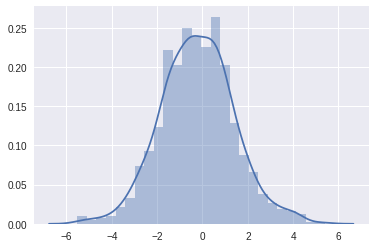

In [387]:
sns.distplot(results)